# Website Traffic Analysis

# Understanding Traffic Patterns and Optimizing Link Performance

In this project, I aim to analyze web traffic data to better understand the volume and distribution of events associated with links, and to explore ways to increase their click-through rates (CTR). By diving into the data, I want to uncover actionable insights that can enhance user engagement and improve overall performance.

## Goals and Questions

1. **Volume of Events**:
   - Using **Pandas**, analyze how many total pageview events the links received during the entire observed period.
   - Break this down to see the average number of pageviews per day.
   - Examine other recorded events to identify trends and patterns in their occurrence.

2. **Geographic Insights**:
   - Determine where the pageviews are coming from.
   - Map the geographic distribution of traffic to better understand the audience's location.

3. **Click-Through Rates (CTR)**:
   - Calculate the overall click rate by comparing clicks to pageviews. This metric will offer a high-level view of link performance.
   - Analyze how the click rate varies across different links to identify underperforming and high-performing links.

4. **Relationship Between Clicks and Previews**:
   - Use a combination of **Pandas** and **SciPy** to explore whether there is a correlation between clicks and previews for a given link.
   - Test for potential linear relationships and consider categorical factors (e.g., binary indicators) to understand if certain conditions impact this relationship.
   - Assess the significance and magnitude of any observed effects.

## Objective

By answering these questions, I hope to uncover meaningful insights and provide a data-driven approach to improving link performance and engagement metrics.


## Exploratory Data Analysis


We will start by loading the required libraries. We'll use Pandas to create and analyse the data set and we will use Scipy to calculate some statistics. For some mathematical operations, the Numpy library may come in handy, as it is the most popular library in Python for numerical computing.



In [1]:
# import libraries, pandas and scipy are required, numpy will come in handy
import pandas as pd
import numpy as np

from scipy import stats


We can use Pandas' read_csv() method to load the CSV data set into a Pandas Dataframe object.



In [2]:
# modify this to point to the downloaded CSV file
CSV_FILEPATH = "traffic.csv"
# load the data set
df = pd.read_csv(CSV_FILEPATH)


The shape and the 'head' of a DataFrame and the most basic methods that are almost always used whenever we are working with the Pandas library. The former prints the number of columns and rows in the data as a tuple, while the latter prints out the first n (5 by default) rows of the data set. We can use it to get a feeling about what the data actually looks like.



In [3]:
# (#columns, #rows)
df.shape


(226278, 9)

In [4]:
# printing the first five rows
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


## Question 1


**[Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?**


To print each unique value of the event column, alongside a count of its occurrences, we can use the value_counts() method. The output for the pageview events is 142,015, so that is our total number of such events. Another solution for it would be to filter the data set to contain only the pageview events and then to read the number of rows in the filtered data set (second cell below).



In [5]:
# the data set records three types of events: pageview, click, preview
df["event"].value_counts()


event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

In [6]:
# the total pageview events is the number of rows where 'event' = 'pageview'
df[df["event"] == "pageview"].shape[0]


142015

Getting the number of pageview events per day requires the application of the groupby method, followed by an aggregate (count) function.

We group the pageview events by the date and then count their occurrence.



In [7]:
# 1. filter only for 'pageview' events
# 2. group by the date
# 3. keep only the 'event' column, and specify a 'count' aggregation
df[df["event"] == "pageview"].groupby(by="date")["event"].count()


date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

Please note that we allow for duplicates in the data, i.e., if the same user views the same page multiple times, it will be counted each time. We can use df.drop_duplicates() to modify this behaviour and see the difference. The following cells illustrate the difference in the data caused after deduplicating: the number of events lowers by nearly half.



In [8]:
df_deduplicated = df.drop_duplicates()


In [9]:
df_deduplicated["event"].value_counts()


event
pageview    73360
click       32499
preview     16708
Name: count, dtype: int64

In [10]:
df_deduplicated[df_deduplicated["event"] == "pageview"].shape[0]

73360

In [11]:
df_deduplicated[df_deduplicated["event"] == "pageview"].groupby(by="date")["event"].count()


date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

## Question 2


**[Pandas] What about the other recorded events?**



In the first line in the cell below we obtain the set of all unique events in the data. Then, we remove the pageview event because it was already analysed in the previous question. We will deal with whatever events remain.



In [12]:
# get the set of recorded events in the data
recorded_events = set(df["event"].unique())
# remove the 'pageview' event
recorded_events.remove("pageview")
recorded_events


{'click', 'preview'}

Once we have the other recorded events, we can simply loop over them and apply the same solution from Question 1, adding some informative print statements in the process.



In [13]:
# loop over each event
for recorded_event in recorded_events:
    # get the total number of occurrences
    total_events = df[df["event"] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is", total_events, "\n")
    # group by the date and aggregate by count
    data_set = df[df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(recorded_event, "event distribution per day:\n")
    print(data_set, "\n")


Total number of click events is 55732 

click event distribution per day:

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 

Total number of preview events is 28531 

preview event distribution per day:

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 



## Question 3


**[Pandas] Which countries did the clicks come from?**

This question is a bit simpler than the ones before, in the sense that it does not require any groupings or aggregations. The solution consists of two steps:

1. We need to filter for the click events only
2. We can print the unique values of the Country column (ignoring any nans)


In [14]:
# filter for the proper event
df_q3 = df[df["event"] == "click"]
# or alternatively, you can loop over the array provided by df.unique() and print them all
pd.DataFrame(data=df_q3["country"].dropna().unique(), columns=["Country"])


,Country
0,Saudi Arabia
1,India
2,France
3,Maldives
4,United States
...,...
197,Guernsey
198,Palau
199,Åland
200,Principality of Monaco


## Question 4


**[Pandas] What was the overall click rate (clicks/pageviews)?**



The click rate is the number of clicks that a page has received (event = 'click') divided by the number of times it has been shown (event = 'pageview'). It is a commonly used metric that measures the success of an advertising campaign.

Its calculation requires a few steps.

To start with, we can count the number of times each link has been clicked on, and the number of times each link has been viewed. The same procedure applies to both calculations. We first filter for the proper event (click or pageview), then we group the filtered data by the link Id and count the occurrences of that event.



In [15]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'pageview' events
pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
pageviews = pageviews.rename(columns={
    "event": "pageviews"
})


In [16]:
link_clicks.head()


,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [17]:
pageviews.head()


,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


To get the answer, we need to somehow join these two Dataframes on the same link Id, and then divide the number of clicks by the number of pageviews to get the required click rate. It can be achieved with Pandas' merge() method. We specify a 'left' and a 'right' Dataframe, a column to merge on, and how the merge should go (we specify 'inner' which takes the intersection of the two data sets).



In [18]:
# pd.merge() does a database-style join of the two dataframes
df_q4 = pd.merge(left=link_clicks, right=pageviews, on="linkid", how="inner")


In [19]:
# define a new column of the 'click_rate'
df_q4["click_rate"] = df_q4["clicks"] / df_q4["pageviews"]


Once we do the merge, we can do column-wise arithmetics to produce a new column that would store the click rate. The cell below prints the final data set, providing us with the click rate for each link.



In [20]:
df_q4


,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


## Question 5


**[Pandas] How does the clickrate distribute across different links?**



To get a sense of the distribution of the click rate across different links, we can use the describe() method. The cell below does that. Observe the output. We have the count (number of links), the mean, standard deviation, min, max, as well as the value of the click rate at the 25, 50, and 75th percentile.



In [22]:
df_q4["click_rate"].describe()


count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click_rate, dtype: float64

Tabular data can only give us so much, so we can try to plot the data and visualize some insights.

Using the plot() method we plot a histogram with 100 bins. Notice how we provide parameters for the figure size and the label of the X-axis. It is always a good idea to have these as they provide make the interpretation of the graphic a lot easier.



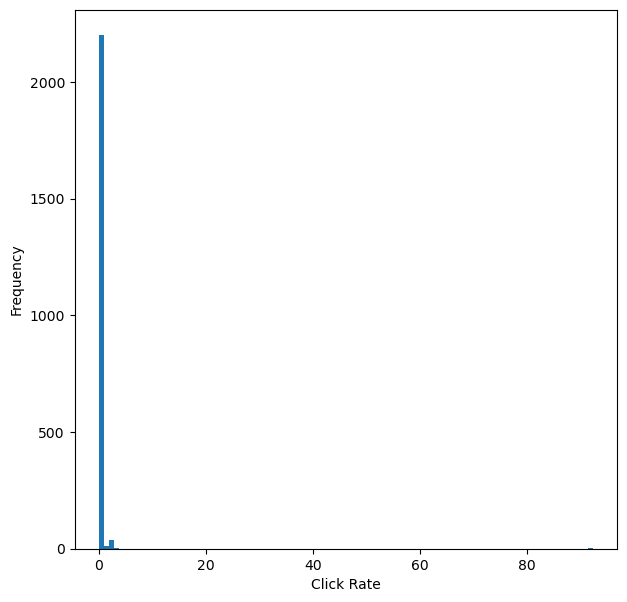

In [23]:
ax = df_q4["click_rate"].plot(kind="hist", figsize=(7, 7), bins=100)
_ = ax.set_xlabel("Click Rate")


The histogram shows that the data is highly skewed to left, i.e., many of its values are very close to zero. In such cases, a common workaround is to plot the histogram of the logarithm of the data. Let us try that, we can use Numpy's log2() method for it!



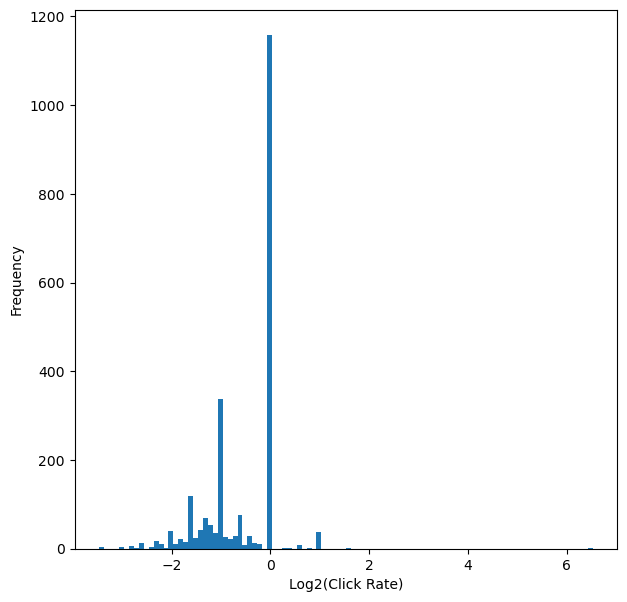

In [24]:
# because the data is highly skewed, it makes more sense to plot the log of it
df_q4["click_rate_log2"] = np.log2(df_q4["click_rate"])
ax = df_q4["click_rate_log2"].plot(kind="hist", figsize=(7, 7), bins=100)
_ = ax.set_xlabel("Log2(Click Rate)")


We observe an enormous spike at the 0 meaning that the actual click rate was 1, implying that there are many links that have been viewed and clicked on exactly once. There are also, many links that have been viewed many times but clicked on fewer (values less than zero). Remember, this plots the logarithm of the actual values, so there is an extra math step in the interpretation here.

One last thing to try is a box plot, which is basically a visualization of the describe() method.



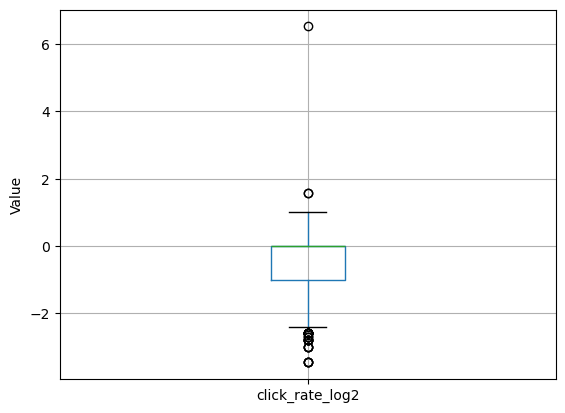

In [25]:
ax = df_q4.boxplot(column="click_rate_log2")
_ = ax.set_ylabel("Value")


We observe two (and one particular) high outliers, and many, many below the Q1 (i.e., click rate very close to zero). Our guess is that there are at least two links, that have been clicked on multiple times in the same page view.



## Question 6


**[Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.**



Pearson's correlation coefficient is a measure of linear correlation between two data sets. It takes its value in the range of [-1, 1] and the further it is from zero, the more significant the correlation is.

Pearson's coefficient is implemented in both Pandas and Scipy, and here we are actually going to use both libraries, just to explore their APIs and to compare results! (should be the same).

First, let us filter the data to contain only the click and the preview events. We can describe it to get a sense of the contents.



In [26]:
# filter only events that are relevant to the question
df_q6 = df[df["event"].isin(["click", "preview"])]


In [27]:
df_q6.describe()


,event,date,country,city,artist,album,track,isrc,linkid
count,84263,84263,84261,84261,84252,84262,84262,82036,84263
unique,2,7,206,8137,1549,2003,2155,628,2286
top,click,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,55732,12995,18461,8893,15666,15666,15666,15666,15666


Now, we just repeat the same procedure as in Question 4. We create two new columns and append them to the original data.



In [28]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'preview' events
previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={
    "event": "previews"
})


In [29]:
# perform two database-style joins to append the 
# number of link clicks and previews to each row
df_q6 = pd.merge(left=df_q6, right=link_clicks, how="left", on="linkid")
df_q6 = pd.merge(left=df_q6, right=previews, how="left", on="linkid")


Finally, we calculate the correlation coefficient with both pandas and scipy.



In [30]:
df_q6.dropna(subset=["clicks", "previews"], inplace=True)
df_q6


,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109.0,1605.0


In [37]:
stats.pearsonr(x=df_q6["clicks"], y=df_q6["previews"])


PearsonRResult(statistic=0.9987125072008565, pvalue=0.0)

Almost perfectly positive correlation between the number of clicks and previews which seems logical; given that the one is actually dependent on the other (can't have clicks without previews and vice versa).

Using pd.factorize() we can quantify the relationship between categorical variables in similar manner as with numerical variables.



In [38]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = df_q6[categorical_columns] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df


,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000


We observe a high positive correlation between album, artist, and track and almost no correlation between other variables. This is again expected, since those variables are naturally dependent, i.e., each track belongs to an album and is performed by an artist.

### **Insights from Web Traffic Analysis**

Through this comprehensive analysis of web traffic data, several key insights have emerged that can inform future strategies to optimize link performance and increase user engagement:

1. **Volume and Distribution of Events**:
    - The dataset highlights three primary types of events—**pageviews, clicks, and previews**—with **pageviews** being the most frequent event type.
    - The daily distribution shows a steady flow of user interactions, providing opportunities to identify peak activity periods for targeted interventions.

2. **Geographic Insights**:
    - Web traffic spans a diverse range of countries, revealing significant global reach.
    - This geographic distribution emphasizes the need for localized strategies to improve engagement in specific regions.

3. **Click-Through Rate (CTR) Analysis**:
    - The overall CTR suggests strong performance, but link-level analysis reveals significant variability.
    - While some links perform exceptionally well, others fall short, indicating room for optimization through improved targeting, design, or content.

4. **Correlation Between Clicks and Previews**:
    - The analysis demonstrates an almost perfect positive correlation between clicks and previews, affirming their interdependence.
    - This highlights the importance of ensuring compelling preview content to drive clicks effectively.

5. **Categorical Relationships**:
    - Factorization of categorical variables (e.g., **artist, album, track**) shows strong dependencies, as expected, providing confidence in the logical structure of the dataset.
    - However, weak correlations with location-based variables (e.g., **country, city**) suggest that user engagement may not heavily depend on geographic factors for this dataset.


### **Next Steps and Recommendations**

- **Focus on Underperforming Links**: Analyze the characteristics of low-CTR links to identify specific factors contributing to their inefficiency.
- **Leverage Geographic Data**: Although country-level correlations are low, tailoring content for high-traffic regions might further boost engagement.
- **Enhance Previews for Better CTR**: Given the strong correlation between previews and clicks, optimizing preview content offers a direct path to improved link performance.
- **Explore Temporal Patterns**: Investigating time-based trends (e.g., peak days or hours) could guide campaign scheduling for maximum impact.
